## R17 ; ggplot2-1

#### ggplot : grammar of graphics
- \+ 기호를 이용하여 일련의 그래프 생성 함수들을 연겨하는 방식으로 생성한다
- 기본적으로 data.frame을 data 인수로 받음
- aes() 함수를 통해 x축 y축에 들어갈 변수를 배치하고, 축 뿐만 아니라 데이터셋에 포함된 각 변수들을 집단,색상,심볼 등으로 대응시켜 시각적으로 표현 가능
- 매핑 후에 geom객체 즉 실제 그래프를 그려주는 함수들을 불러야 그래프가 완성된다
- 추가적으로 labs(),,, 제목 등의 옵션도 추가가능
- ggplot은 집단별로 그래프를 그릴때 확실히 factor처리 해주자 => 연속형 데이터가 그대로 들어가도 불가능한건 아니지만 목적이 달라짐


In [11]:
install.packages('gridExtra')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [26]:
library(ggplot2)
library(gridExtra) 
theme_set(theme_gray(base_family="Courier"))
# 내장 graphics에서는 par(mfrow)이런식으로 window 조절 ggplot2는 사용 불가
# gridExtra 패키지를 통해 각 ggplot을 객체에 담고 grid.arrange(fig1,fig2,,,,ncol=,nrow=) 함수를 통해 window 관리

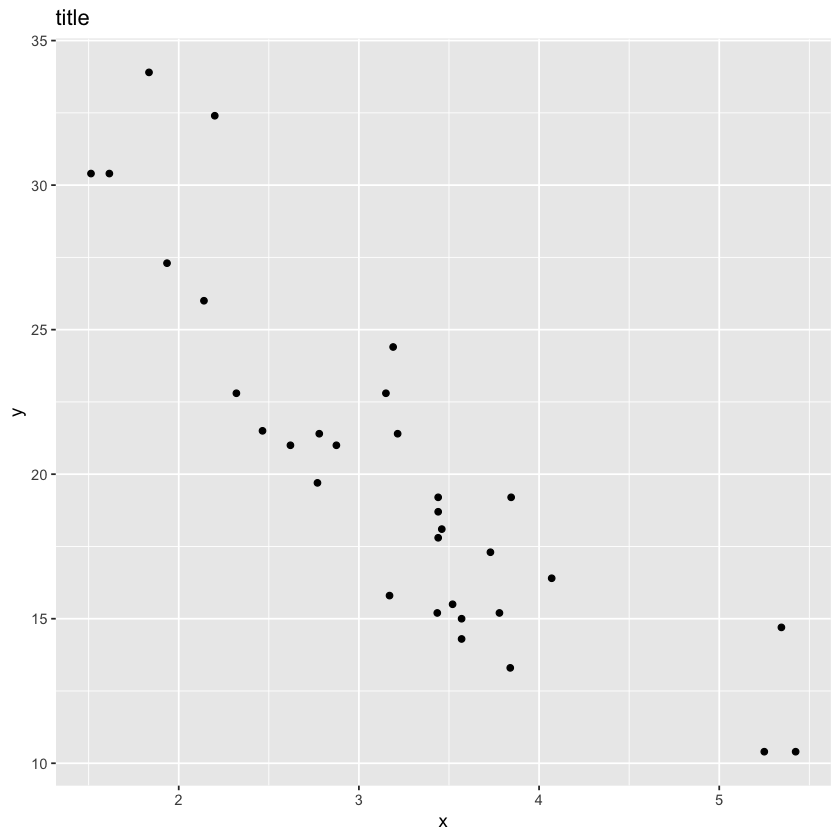

In [3]:
# 먼저 ggplot2 의 간략한 예시를 만들어보고 문법들을 파해쳐보자
ggplot(data=mtcars,aes(x=wt,y=mpg)) +
    geom_point()+
    labs(title = 'title', x = 'x', y = 'y')

## 다양한 geom 객체

Warning message:
“Ignoring unknown parameters: ylim”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


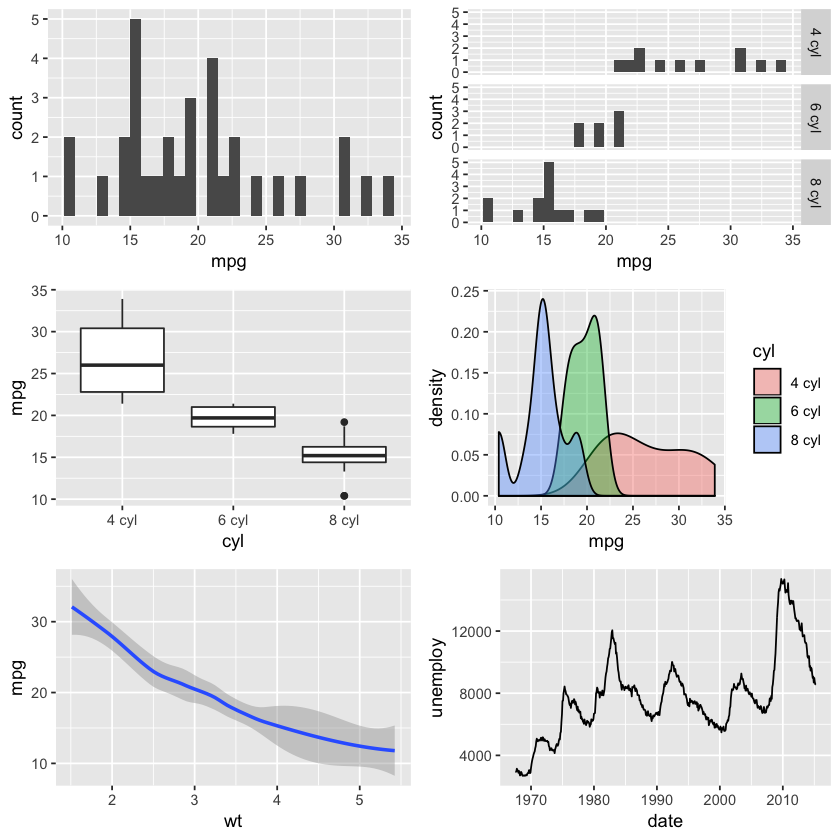

In [31]:
data<-mtcars
data$gear <- factor(data$gear,levels=c(3,4,5),labels=c('3 gear','4 gears','5 gears'))
data$cyl <- factor(data$cyl,levels=c(4,6,8),labels=c('4 cyl','6 cyl','8 cyl'))

fig1<-ggplot(data,aes(x=mpg))+geom_histogram()
fig2<-ggplot(data,aes(x=mpg))+geom_histogram(ylim=c(0,5))+facet_grid(cyl~.)
fig3<-ggplot(data,aes(x=cyl,y=mpg))+geom_boxplot()
fig4<-ggplot(data,aes(x=mpg,fill=cyl))+geom_density(alpha=0.4)
fig5<-ggplot(data,aes(x=wt,y=mpg))+geom_smooth()
fig6<-ggplot(economics,aes(x=date,y=unemploy))+geom_line()
grid.arrange(fig1,fig2,fig3,fig4,fig5,fig6)

## geom 객체에 다양한 옵션 추가 하기

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


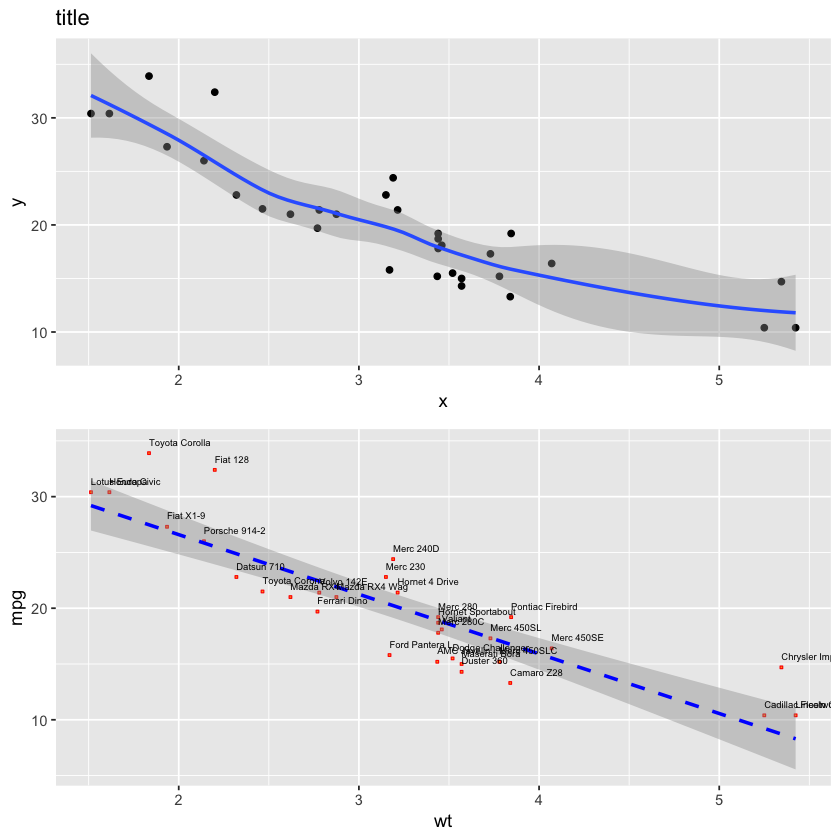

In [49]:
# geom 객체들을 중첩할수 있다
a<-ggplot(data=mtcars,aes(x=wt,y=mpg))+
    geom_point()+
    geom_smooth() +
    labs(title='title',x='x',y='y')

#geom 객체에 다양한 옵션 추가할수 있다
#내장 graphics와 비슷한 옵션들이 존재하나 이름이 조금씩 다를수 있다
b<-ggplot(data=mtcars,aes(x=wt,y=mpg))+
    geom_point(col='red',bg='orange',pch=22,size=0.5)+
    geom_smooth(method = 'lm', color = 'blue', lty = 'dashed')+
    geom_text(label = row.names(mtcars),hjust=0, vjust = 0,nudge_y = 0.7,size=2)
grid.arrange(a,b,nrow=2)


'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


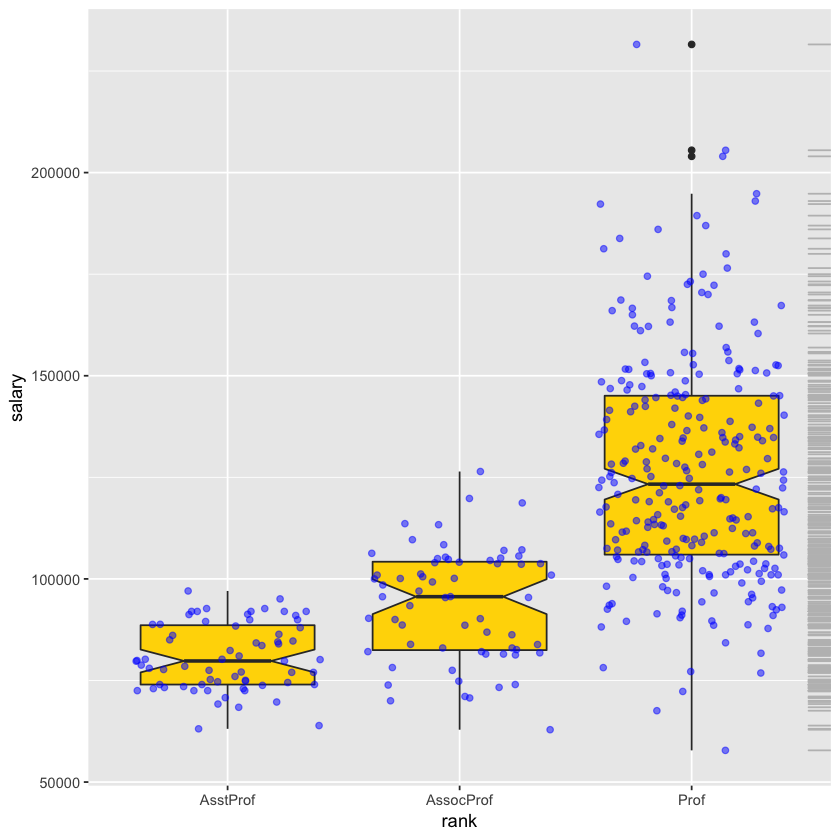

In [59]:
# 좀더 다양한 옵션들을보자
# geom_boxplot geom_point geom_rug
library(car)
str(Salaries)
ggplot(data = Salaries,aes(x=rank,y=salary))+
    geom_boxplot(fill='gold',notch = T)+ # x에 factor들어가있다
    geom_point(position='jitter',color='blue',alpha=0.5)+ # x에 factor들어가있다
    geom_rug(sides='r',color='gray') 


## ggplot의 장점은 내가 원하는대로 geom 함수들을 결합하여 그래프를 그릴수 있다는점이다

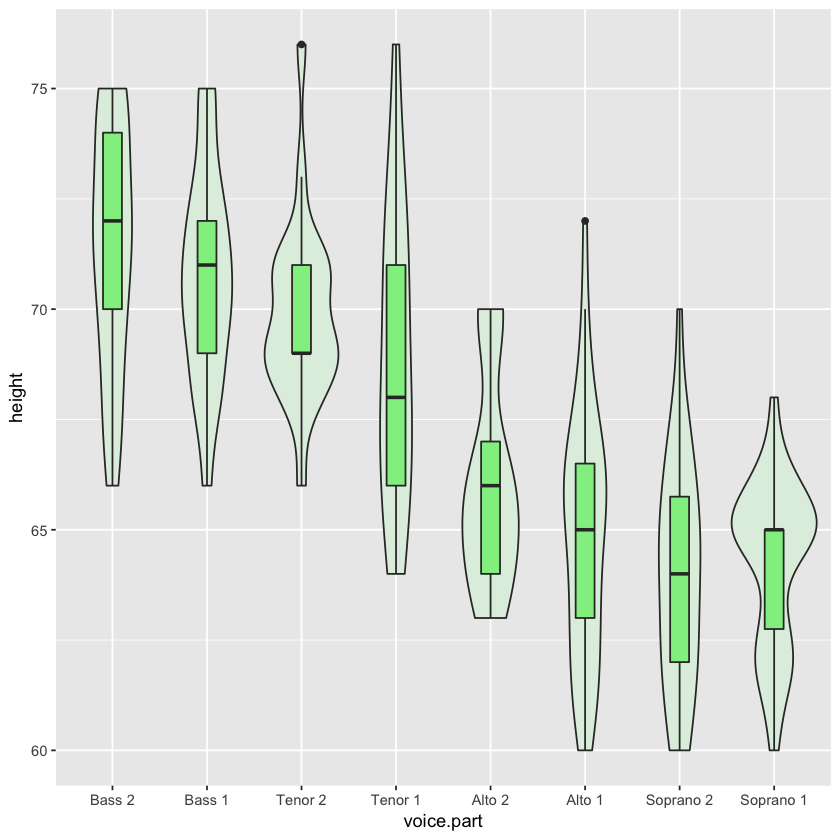

In [69]:
library(lattice)
ggplot(singer,aes(x=voice.part,y=height))+
    geom_violin(fill='honeydew2') +
    geom_boxplot(fill='lightgreen',width=0.2)

## 집단별 그래프 그리기
- 반드시 factor 만들어라
- aes()함수에 집단변수(factor)를 그래상의 시각적인 특성(도형,선,색,채우기)데 mapping시키자

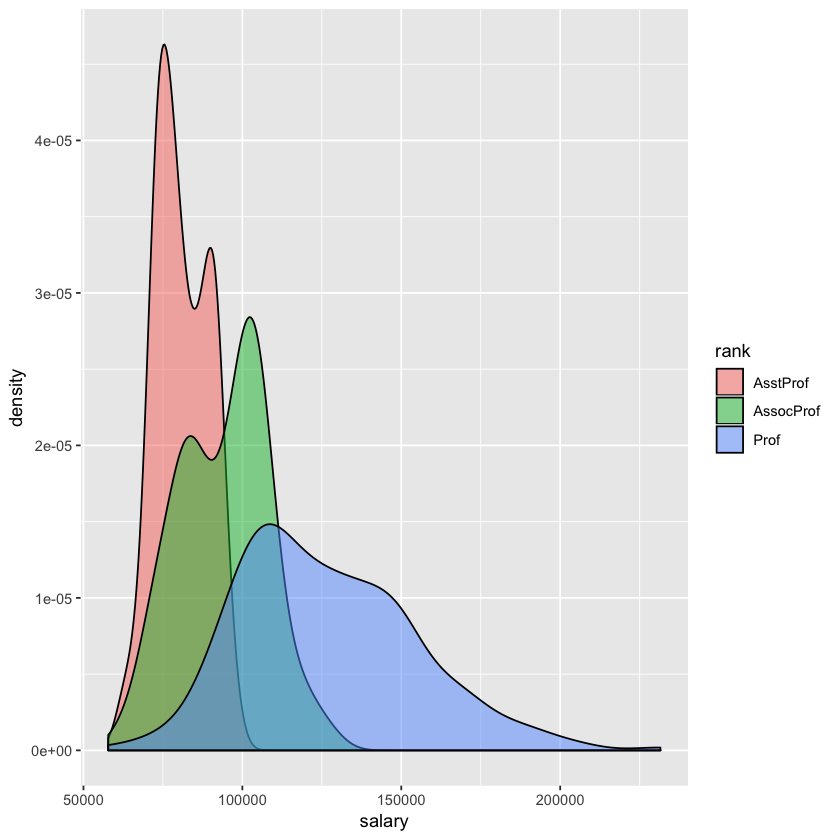

In [73]:
#하나의 집단으로 구분
library(car)
ggplot(Salaries,aes(x=salary,fill=rank))+geom_density(alpha=0.5)

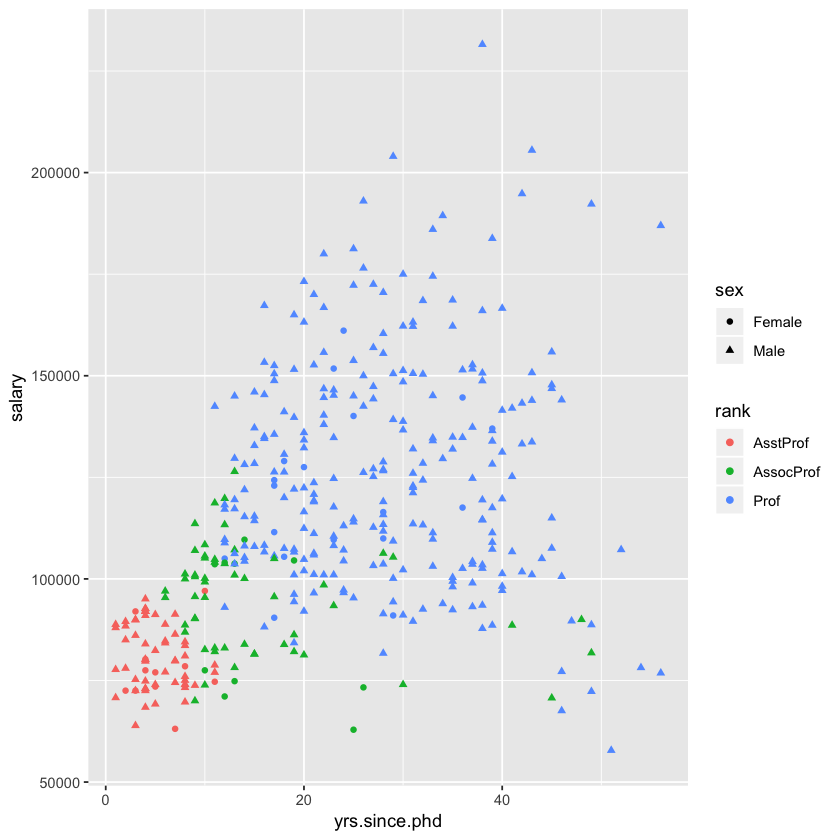

In [76]:
#두개의 집단으로 구분해보자
library(car)
ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank,shape=sex))+geom_point()

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


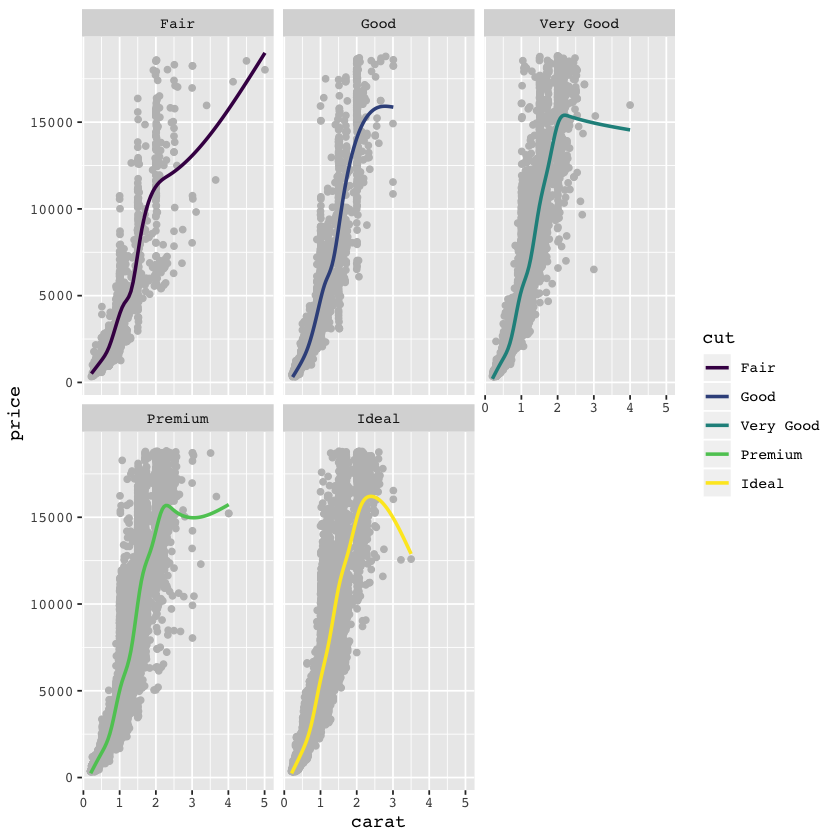

In [75]:
# 집단별 특성을 어느 layer에서 표현할지 정확히 구분해야한다
# 무조건 ggplot() 함수 내에서 col=cut하면 geom_point geom_smooth에 다 적용된다
library(ggplot2)
str(diamonds)
ggplot(diamonds,aes(x=carat,y=price))+
    geom_point(col='gray') +
    geom_smooth(aes(col=cut),se=F)+
    facet_wrap(~cut,nrow=2)

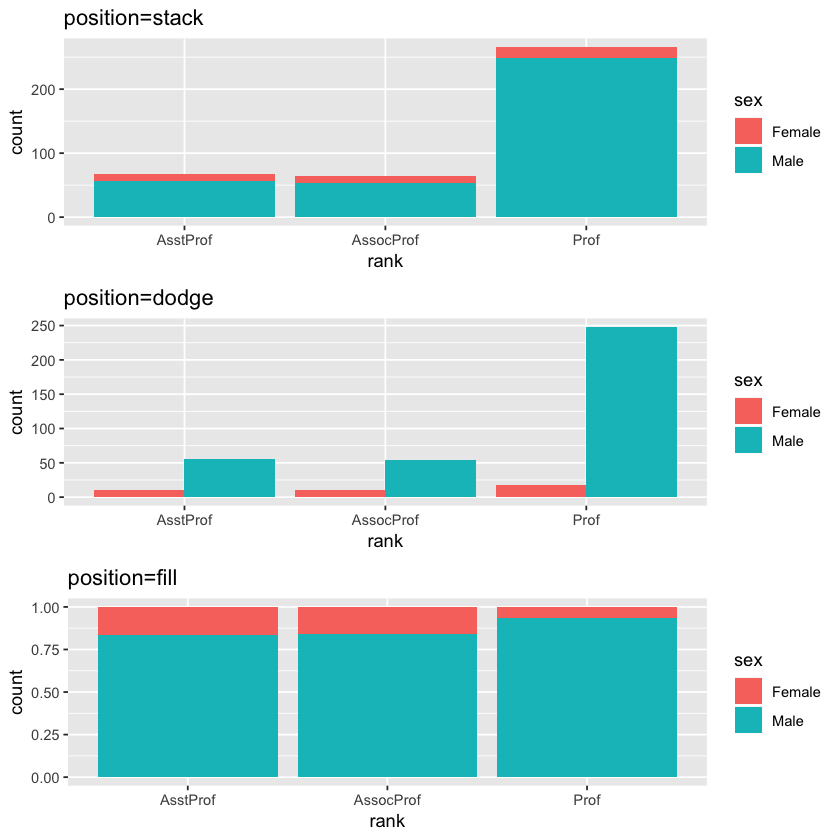

In [90]:
# 집단변수를 이용해서 막대도표 생성
# 내장 graphics에서는 2차원 matrix집어 넣어서 구현했었다
# 막대 도표는 default 상태에서 x축만 mapping 해주면 자동적으로 빈도를 계산해준다
fig1<-ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar(position='stack') +ggtitle('position=stack')+xlab('rank')+ylab('count')
fig2<-ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar(position='dodge') +labs(title='position=dodge')
fig3<-ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar(position='fill') +labs(title='position=fill')
grid.arrange(fig1,fig2,fig3,nrow=3)

Var1,Freq
AsstProf,67
AssocProf,64
Prof,266


           sex
rank        Female Male
  AsstProf      11   56
  AssocProf     10   54
  Prof          18  248

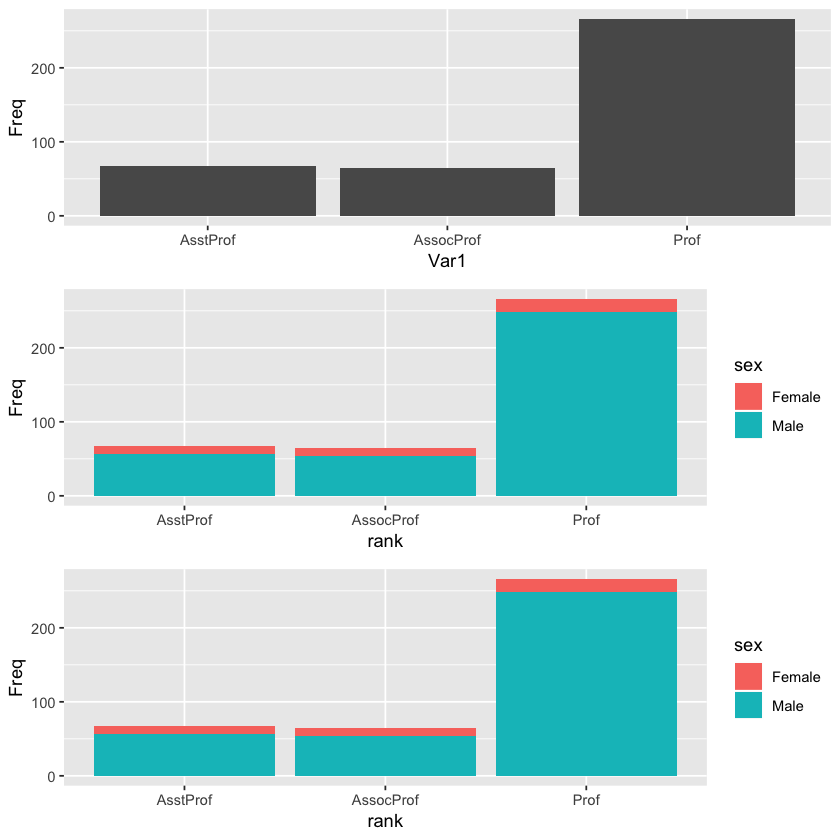

In [3]:
# 막대 도표는 default 상태에서 x축만 mapping 해주면 자동적으로 빈도를 계산해준다
# geom_bar goem_col 다르다
# 옵션을 이용해서 이를 조작해보자
library(car)
as.data.frame(table(Salaries$rank))
table.df<-as.data.frame(table(Salaries$rank))
fig1<-ggplot(table.df,aes(x=Var1,y=Freq))+geom_bar(stat='identity')

# 집단 두개일때
xtabs(~rank+sex,Salaries)
table.df<-as.data.frame(table(rank=Salaries$rank,sex=Salaries$sex))
fig2<-ggplot(table.df,aes(x=rank,y=Freq,fill=sex))+geom_bar(stat='identity')
fig3<-ggplot(table.df,aes(x=rank,y=Freq,fill=sex))+geom_col()
grid.arrange(fig1,fig2,fig3)


## 각 집단별로 별도의 패널에 그래프 그리기
- facet_grid() : 행에 위치할 집단변수와 열에 위치한 집단벼수를 ~ 중심으로 각각 왼쪽과 오른쪽에 인수로 지정한다
- facet_wrap() : 하나의 집단변수만을 ~다음에 지정하고 ncol nrow 추가적으로 지정한다

'data.frame':	235 obs. of  2 variables:
 $ height    : num  64 62 66 65 60 61 65 66 65 63 ...
 $ voice.part: Factor w/ 8 levels "Bass 2","Bass 1",..: 8 8 8 8 8 8 8 8 8 8 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


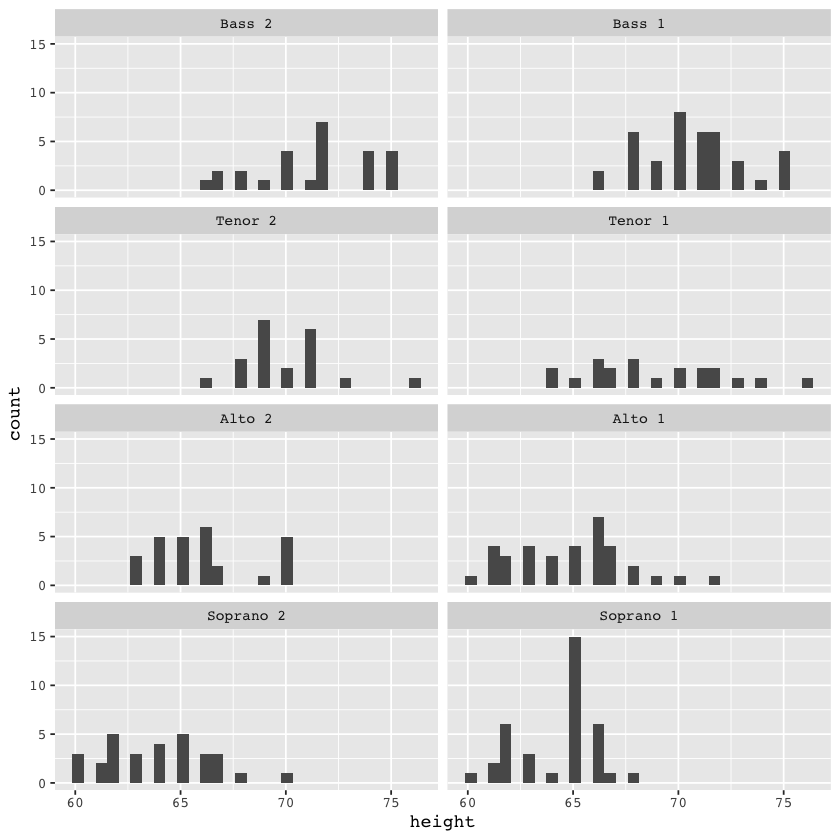

In [99]:
library(lattice)
str(singer)
ggplot(data=singer,aes(x=height))+
    geom_histogram()+
    facet_wrap(~voice.part,nrow=4)

'data.frame':	235 obs. of  2 variables:
 $ height    : num  64 62 66 65 60 61 65 66 65 63 ...
 $ voice.part: Factor w/ 8 levels "Bass 2","Bass 1",..: 8 8 8 8 8 8 8 8 8 8 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


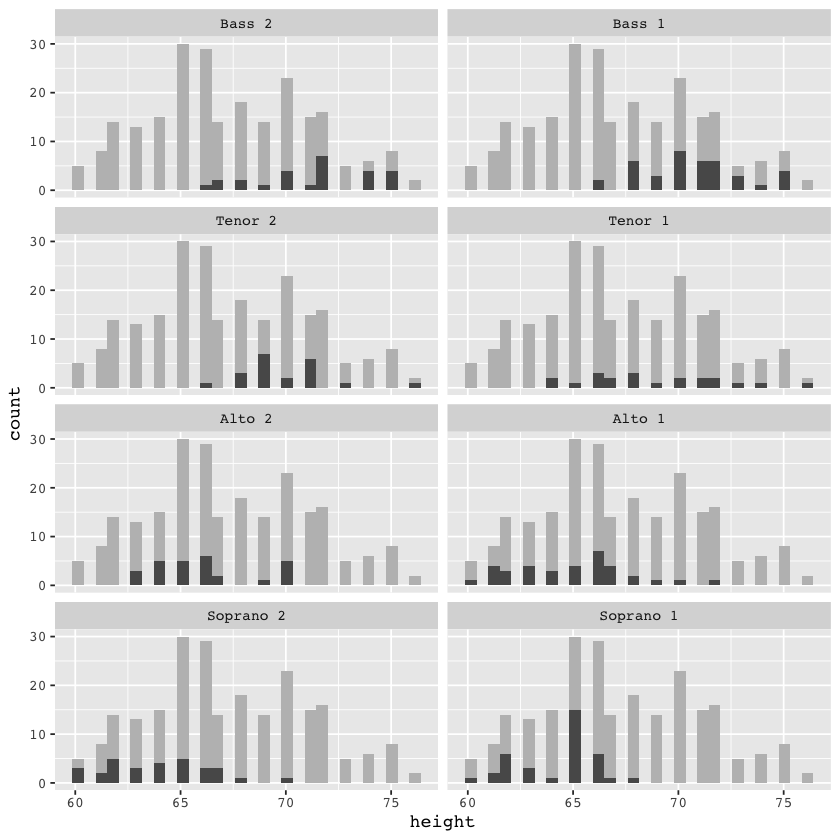

In [97]:
#backgroud 데이터를 사용해보자
#집단을 voice.part를 사용하고있기 때문에 이 변수가 포함되지 않는 데이터를 사용하면
#집단별로 나뉘어지지 않는다
library(lattice)
str(singer)
ggplot(data=singer,aes(x=height))+
    geom_histogram(data=singer[-2],fill='gray')+
    geom_histogram()+
    facet_wrap(~voice.part,nrow=4)

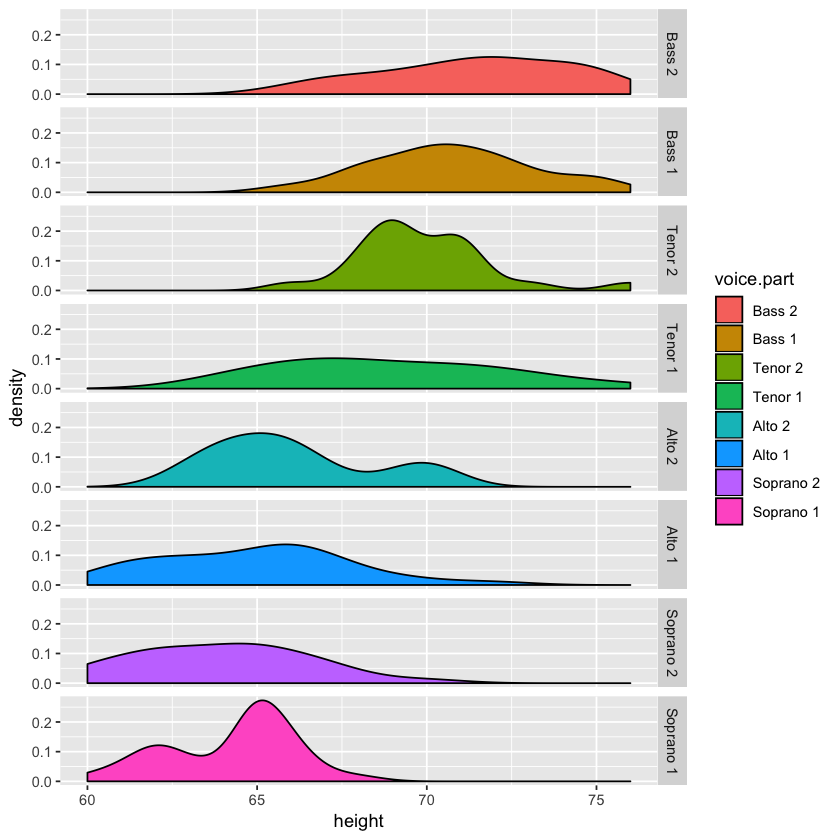

In [117]:
#facet_grid(행~.)
library(lattice)
ggplot(data=singer,aes(x=height,fill=voice.part))+geom_density()+facet_grid(voice.part~.)

'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


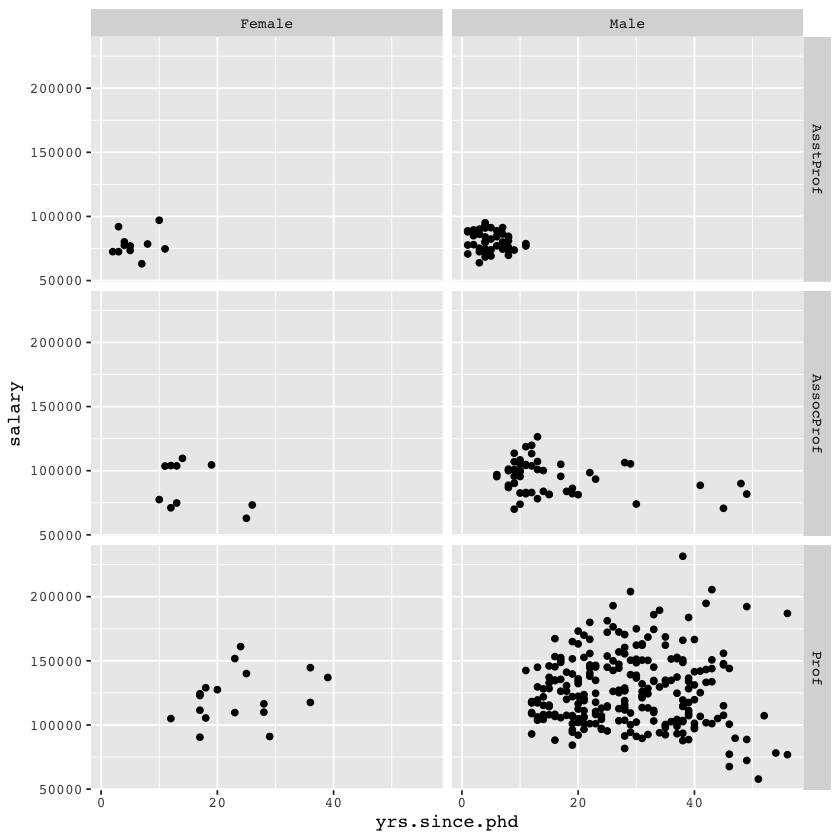

In [100]:
# facet_grid(행~열)
library(car)
str(Salaries)
ggplot(data=Salaries,aes(x=yrs.since.phd,y=salary,))+
       geom_point()+
       facet_grid(rank~sex)

'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AsstProf","AssocProf",..: 3 3 1 3 3 2 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


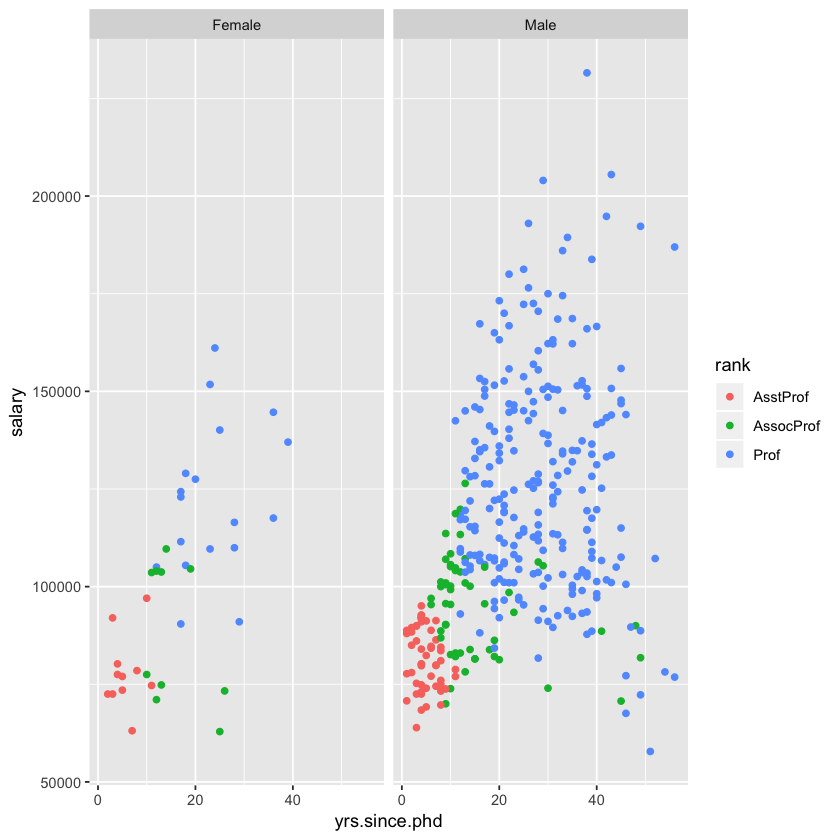

In [126]:
# 다양한 옵션들과 함께 사용해서 더욱 시각적인 표현을 해보자
library(car)
str(Salaries)
ggplot(data=Salaries,aes(x=yrs.since.phd,y=salary,col=rank))+geom_point()+facet_grid(.~sex)

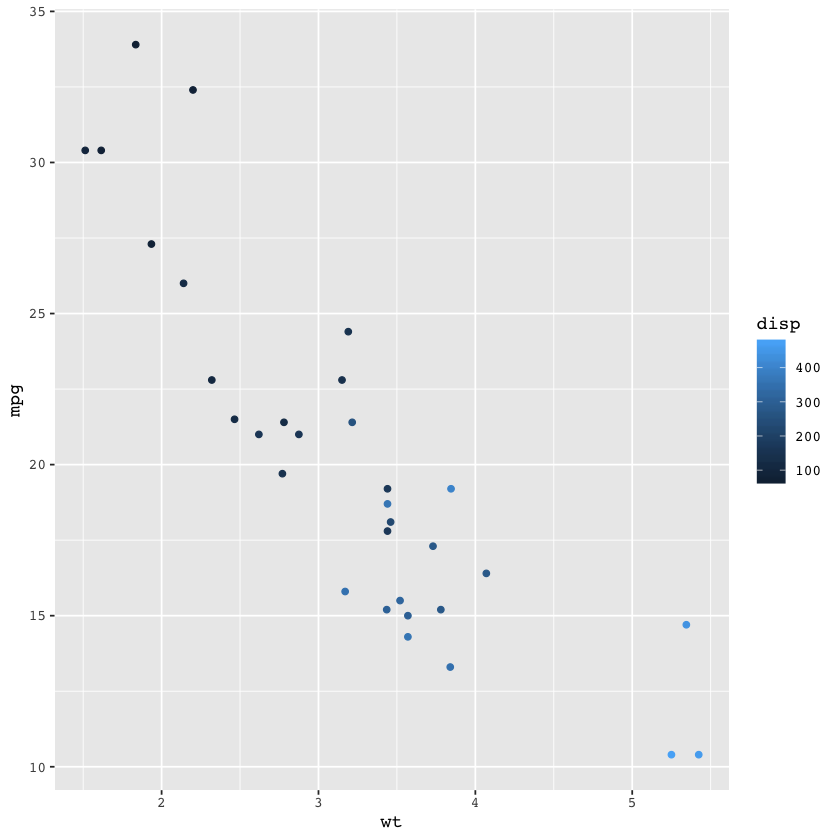

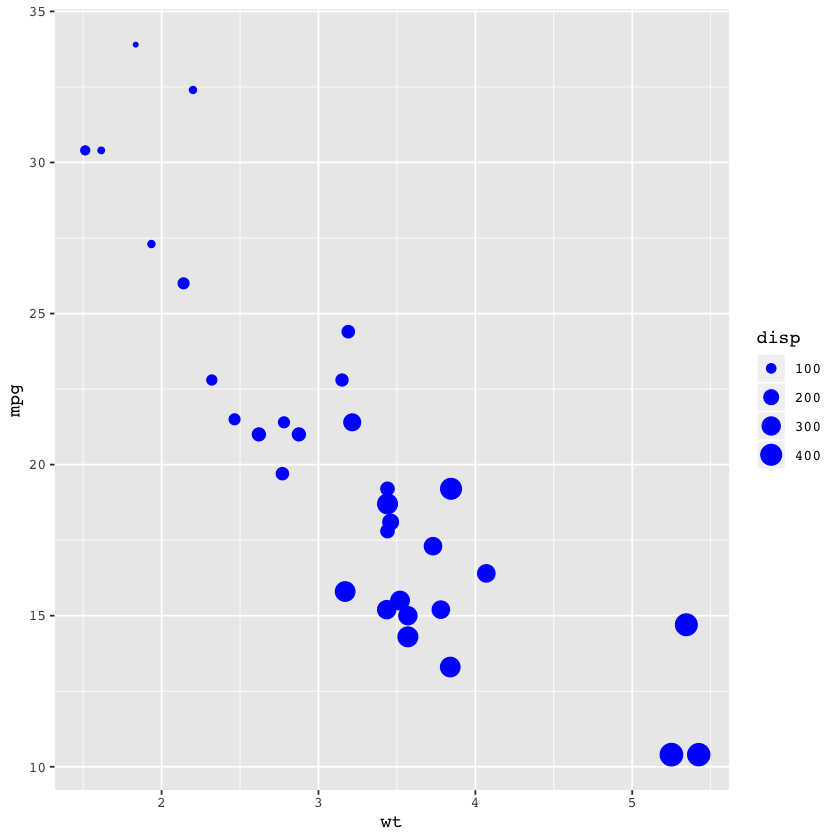

In [50]:
# 범주형 변수가 아닌 연속형 변수로 집단을 나눈다면?

ggplot(data=mtcars,aes(x=wt,y=mpg,color=disp))+geom_point()+scale_color_gradient()
ggplot(data=mtcars,aes(x=wt,y=mpg,size=disp))+geom_point(col='blue')

## scale 옵션
- scale_aes_data_type 의형태를 갖는 함수다
- aes 즉 aesthetic에 대응되어 지정된 aesthetic을 scale 이라고 한다 ex) 집단을 나누는 기준을 col로 했는데 어떤 색상들이 지정되어있느지는 몰랐다. 이를 우리가 원하는 색상으로 지정해줄수 있는 함수가 scale option 함수들이다

In [11]:
seq(50000,200000,50000)

[1]  5000 10000 15000 20000

#### 축 설정
- scale_x_continuous(breaks=위치,lables=눈금의 텍스트,name=축이름,limits)
- scale_x_discrete(breaks=레벨 위치,labels=새로운 레벨,name=축이름,limits)

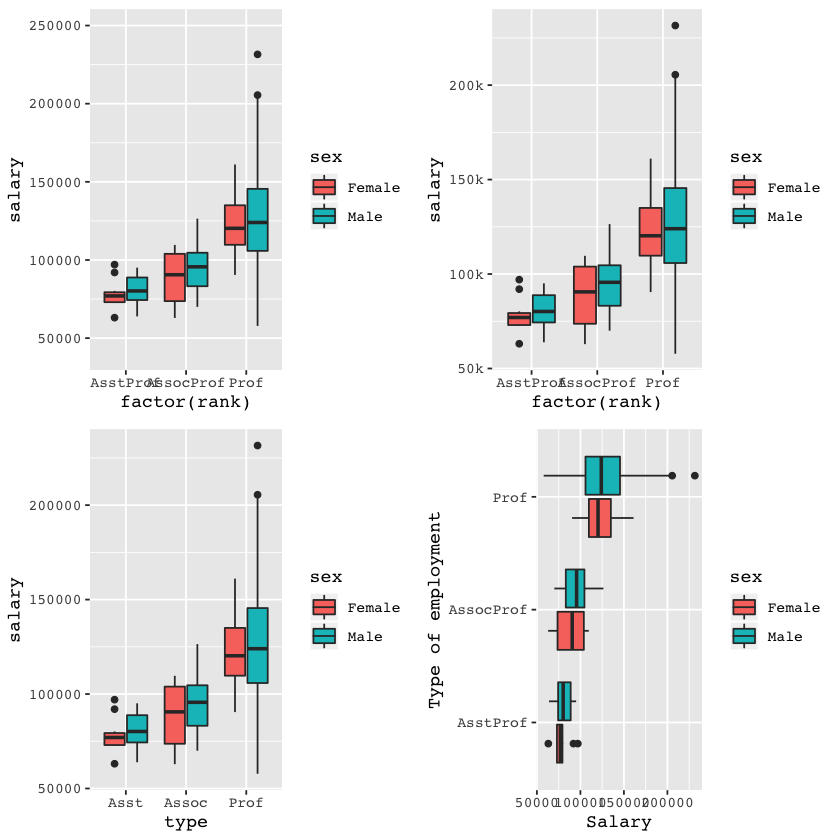

In [33]:
library(car)
fig1<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+
    scale_y_continuous(limits=c(40000,250000))
fig2<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+ 
    scale_y_continuous(breaks=seq(50000,200000,50000),
                       labels=c('50k','100k','150k','200k'))
fig3<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+
    scale_x_discrete(breaks=c('AsstProf','AssocProf','Prof'),
                    labels=c('Asst','Assoc','Prof'),name='type')
fig4<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot() +
    labs(y='Salary',x='Type of employment')+
    coord_flip() 
   
grid.arrange(fig1,fig2,fig3,fig4)

#### 범례 설정
- 그동안 ggplot2는 범례를 자동으로 설정해줬다
- 범례의 제목이나 위치 등을 변경해보자
- 여러가지 방법 존재=> scale_aes_data_type에 딸라 달라진다 ex) 색상이 범례기준이 될수 있고 모양이 될수 있고 다양

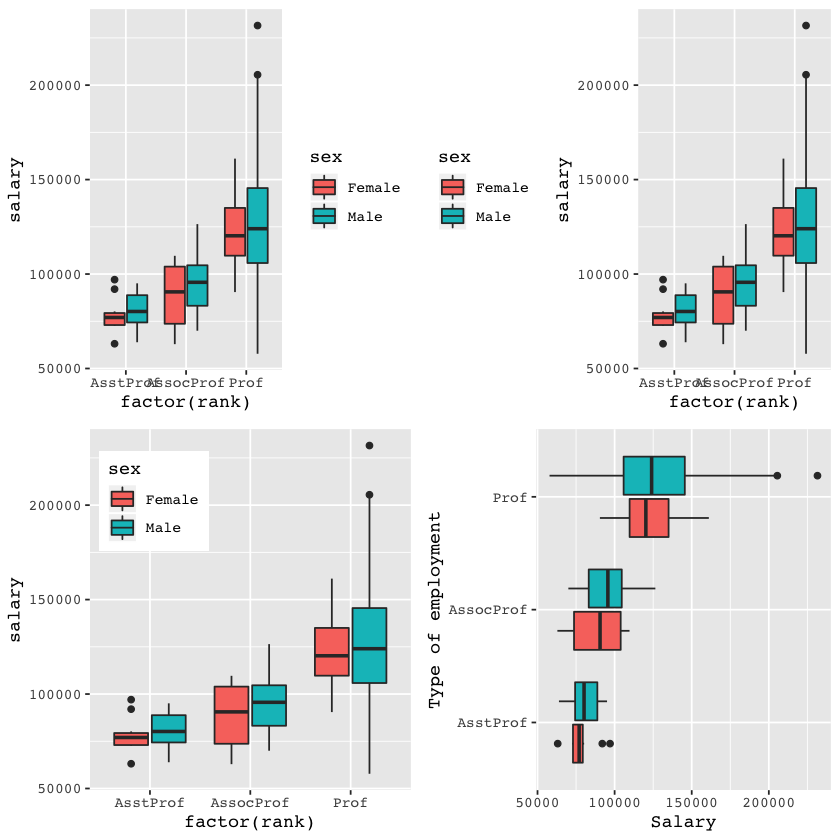

In [45]:
# theme 이용
# theme안에 legend.xxxx 속성 이용
# default 는 legend.posision='right'로 되어있다
fig1<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+ 
    theme(legend.position = 'right')

fig2<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+ 
    theme(legend.position = 'left')

fig3<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+
    theme(legend.position = c(0.2,0.8))

fig4<-ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot() +
    labs(y='Salary',x='Type of employment')+
    coord_flip() +
    theme(legend.position = 'none')
   
grid.arrange(fig1,fig2,fig3,fig4)

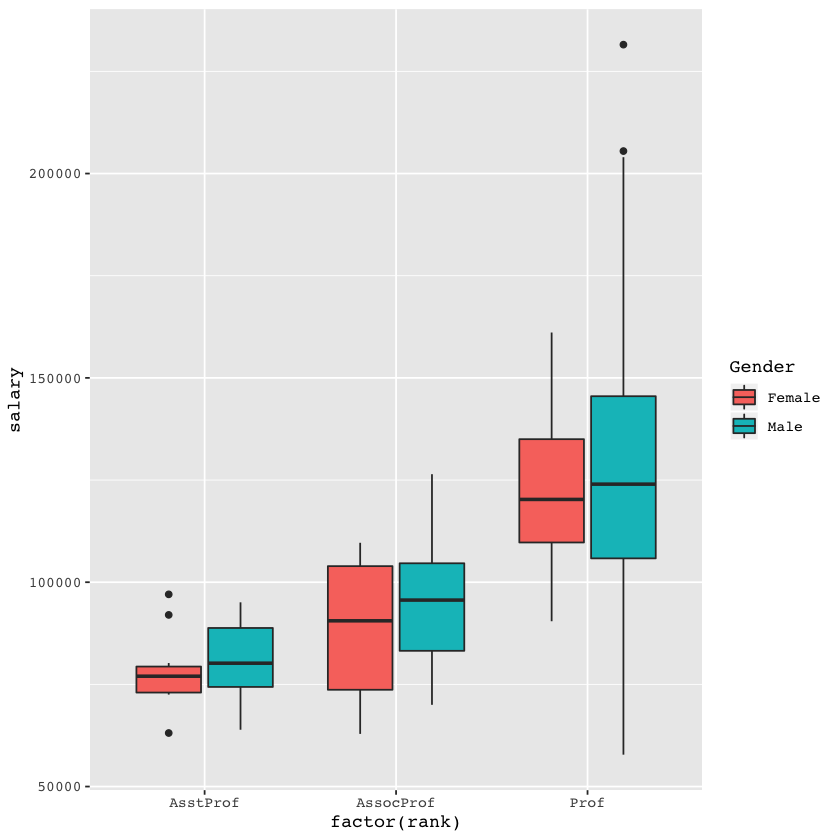

In [48]:
#name 인자를 활용하여 이름 변경 방법 
ggplot(data=Salaries,aes(x=factor(rank),y=salary,fill=sex))+
    geom_boxplot()+ 
    theme(legend.position = 'right')+
    scale_fill_discrete(name='Gender')

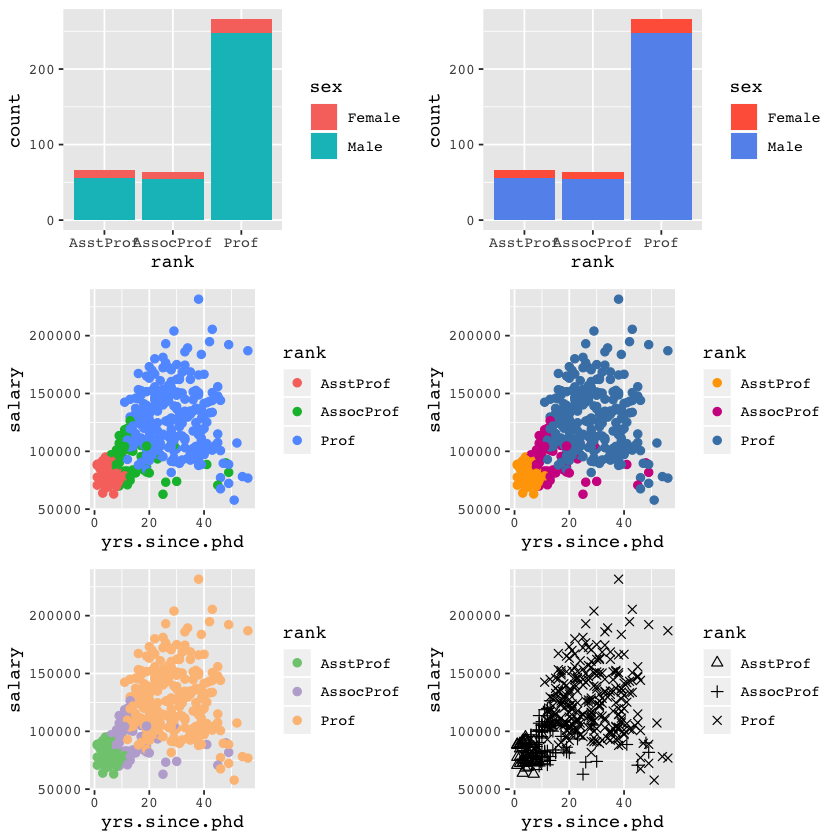

In [65]:
# 색상을 직접 지정하는법 
# scale_xxx_manual
library(car)
fig1<-ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar()

#채우기 색상 지정
fig2<-ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar()+
    scale_fill_manual(values=c('tomato','cornflowerblue'))

fig3<-ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank))+
    geom_point(size=2)

#색상 지정
fig4<-ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank))+
    geom_point(size=2)+
    scale_color_manual(values=c('orange','violetred','steelblue'))

#palette지정
fig5<-ggplot(Salaries,aes(x=yrs.since.phd,y=salary,color=rank))+
    geom_point(size=2)+
    scale_color_brewer(palette='Accent')

#shape 지정
fig6<-ggplot(Salaries,aes(x=yrs.since.phd,y=salary,shape=rank))+
    geom_point(size=2)+
    scale_shape_manual(values=c(2,3,4))
   
grid.arrange(fig1,fig2,fig3,fig4,fig5,fig6)

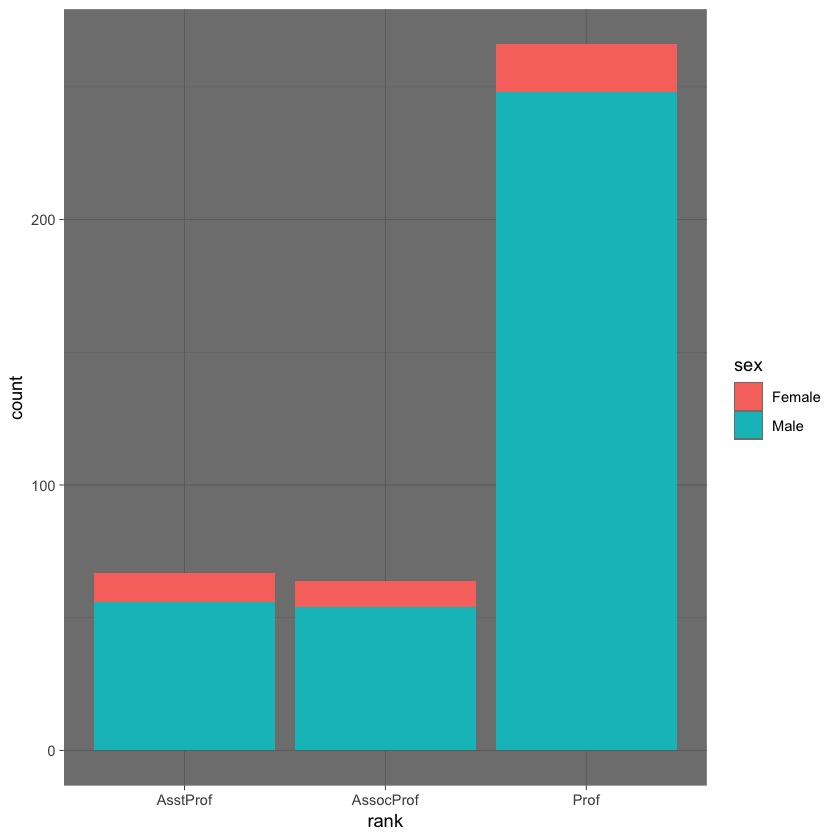

In [73]:
## theme
# theme 설정가능하고 내가 직접 theme 만들어서 사용할수도 있다
# 깊게는 알 필요 없다
library(car)
ggplot(Salaries,aes(x=rank,fill=sex))+geom_bar() + theme_dark()